In [147]:
from pyrosm import OSM, get_data
import geopandas as gpd
import pandas as pd
from sklearn.neighbors import BallTree
import numpy as np
import mapclassify as mc
import matplotlib.pyplot as plt
import time
import networkx as nx
import igraph as ig
import osmnx as ox
import folium
import json

import pandas as pd
import numpy as np
import geopandas as gpd
from ast import literal_eval 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import linregress, t
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from geopy import distance
import requests # to call the openmap/google apis
import json
# import datetime
from datetime import datetime
import math
import itertools

import xport
import pyreadstat


In [148]:
import pandas as pd
import numpy as np
import geopandas as gpd
from ast import literal_eval 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import linregress, t
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import statsmodels.api as sm
import numpy as np

def scaling(x0,y0,name):
    print(len(x0))
    samis = Get_SAMIs(x0,y0)
    print("Var = ",np.round(np.var(samis),2))
    x = np.log10(x0)
    Y = np.log10(y0)
    X = sm.add_constant(x)
    model = sm.OLS(Y,X)
    fit = model.fit(cov_type='HC1')


    intercept, slope = fit.params
    print("intercept = ", np.round(intercept,2))
    print("c = ", np.round(10**intercept,2))

    x_0 =  np.sort(x0)[0]
    y_0 = 10**(slope*np.log10(x_0)+intercept)

    x_f = np.sort(x0)[-1]
    y_f = 10**(slope*np.log10(x_f)+intercept)
    y_null = 10**(np.log10(x_f)+intercept)

    betta = round(slope,3)
    R2 = str(round(fit.rsquared,3))
    print(betta, R2)
    beta_lowerbound, beta_upper = fit.conf_int()[1]
    beta_lowerbound = np.round(beta_lowerbound,2)
    beta_upper = np.round(beta_upper,2)


    plt.rcParams.update({
    'font.size' : 20,
    "lines.linewidth": 2,
    "font.family":"arial",
    #"font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "mathtext.default": "rm",
    "mathtext.rm"  : "arial",
        })

    fig,(ax)  = plt.subplots(1, 1, sharey='row',figsize=(6, 6))
    ax.scatter(x0, y0, facecolors='none', edgecolors='k')
    ax.plot([x_0,x_f],[y_0,y_f], lw = 2, color = 'k')

    ax.text(0.05,0.95,r'$\beta = {}$'.format("{:.2f}".format(betta))+r'$ \, \in \,[{}$'.format(beta_lowerbound) + r'$,{}]$'.format(beta_upper),
            ha='left', va='top',transform=ax.transAxes)
    ax.text(0.05,0.85,r'$\mathit{R}^2 = $' +r'${}$'.format(R2), ha='left', va='top',transform=ax.transAxes)

    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlabel("Population")
    ax.set_ylabel(name)

    # # ax.set_ylim([0.1,10**4])
    # # ax.set_yticks([0.1,1,10**1,10**2,10**3,10**4], minor=True)

    # # ax.set_xlim([10**4,10**9])
    # # ax.set_xticks([10**4,10**5,10**6,10**7,10**8,10**9], minor=True)

    plt.show()
    return fit.conf_int(),samis,betta, float(R2)

def Get_SAMIs(x0,y0):
    x = np.log10(x0)
    y = np.log10(y0)
    res = linregress(x,y)
    y_hat = res.intercept + res.slope*x
    SAMIs = y-y_hat
    return SAMIs


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import linregress, t
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import statsmodels.api as sm
import numpy as np

def scaling_iloc(x0,y0,name):
    print(len(x0))
    samis = Get_SAMIs(x0,y0)
    # print("SAMIs = ",samis)
    print("Var = ",np.round(np.var(samis),2))
    x = np.log10(x0)
    Y = np.log10(y0)
    X = sm.add_constant(x)
    model = sm.OLS(Y,X)
    fit = model.fit(cov_type='HC1')


    intercept, slope = fit.params
    print("intercept = ", np.round(intercept,2))
    print("c = ", np.round(10**intercept,2))

    x_0 =  np.sort(x0)[0]
    y_0 = 10**(slope*np.log10(x_0)+intercept)

    x_f = np.sort(x0)[-1]
    y_f = 10**(slope*np.log10(x_f)+intercept)
    y_null = 10**(np.log10(x_f)+intercept)

    betta = round(slope,2)
    R2 = str(round(fit.rsquared,2))
    beta_lowerbound, beta_upper = fit.conf_int().iloc[1]
    beta_lowerbound = np.round(beta_lowerbound,2)
    beta_upper = np.round(beta_upper,2)


    plt.rcParams.update({
    'font.size' : 20,
    "lines.linewidth": 2,
    "font.family":"arial",
    #"font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "mathtext.default": "rm",
    "mathtext.rm"  : "arial",
        })

    fig,(ax)  = plt.subplots(1, 1, sharey='row',figsize=(6, 6))
    ax.scatter(x0, y0, facecolors='none', edgecolors='k')
    ax.plot([x_0,x_f],[y_0,y_f], lw = 2, color = 'k')

    ax.text(0.05,0.95,r'$\beta = {}$'.format("{:.2f}".format(betta))+r'$ \, \in \,[{}$'.format(beta_lowerbound) + r'$,{}]$'.format(beta_upper),
            ha='left', va='top',transform=ax.transAxes)
    ax.text(0.05,0.85,r'$\mathit{R}^2 = $' +r'${}$'.format(R2), ha='left', va='top',transform=ax.transAxes)

    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlabel("Population")
    ax.set_ylabel(name)

    # ax.set_ylim([0.1,10**4])
    # ax.set_yticks([0.1,1,10**1,10**2,10**3,10**4], minor=True)

    # ax.set_xlim([10**4,10**9])
    # ax.set_xticks([10**4,10**5,10**6,10**7,10**8,10**9], minor=True)

    plt.show()
    return fit.conf_int(),samis,betta, float(R2)

def Get_SAMIs(x0,y0):
    x = np.log10(x0)
    y = np.log10(y0)
    res = linregress(x,y)
    y_hat = res.intercept + res.slope*x
    SAMIs = y-y_hat
    return SAMIs


def all_upper(my_list):
    return list(map(lambda x: x.upper(), my_list))

In [149]:
with open('/Users/tg2426/Documents/Python/Scaling/Data/NHANES/DR1IFF_J.XPT', 'rb') as f:
    # for row in xport.Reader(f):
    #     print(row)
    library = xport.to_dataframe(f)

library

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,93704.0,81714.005497,82442.869214,1.0,1.0,49.0,2.0,2.0,7.0,2.0,...,4.549,0.040,0.000,3.669,0.467,0.0,0.022,0.000,0.001,0.006
1,93704.0,81714.005497,82442.869214,2.0,1.0,49.0,2.0,2.0,7.0,2.0,...,0.459,0.002,0.000,0.072,0.007,0.0,0.002,0.000,0.000,0.000
2,93704.0,81714.005497,82442.869214,3.0,1.0,49.0,2.0,2.0,7.0,2.0,...,4.656,0.106,0.009,5.485,0.226,0.0,0.040,0.000,0.003,0.002
3,93704.0,81714.005497,82442.869214,4.0,1.0,49.0,2.0,2.0,7.0,2.0,...,0.001,0.000,0.000,0.002,0.000,0.0,0.000,0.000,0.000,0.000
4,93704.0,81714.005497,82442.869214,5.0,1.0,49.0,2.0,2.0,7.0,2.0,...,2.043,0.041,0.000,1.418,0.263,0.0,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112678,102956.0,69447.414236,92756.884416,4.0,1.0,81.0,2.0,2.0,10.0,5.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
112679,102956.0,69447.414236,92756.884416,5.0,1.0,81.0,2.0,2.0,10.0,5.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
112680,102956.0,69447.414236,92756.884416,6.0,1.0,81.0,2.0,2.0,10.0,5.0,...,4.317,0.057,0.000,3.086,0.319,0.0,0.170,0.011,0.022,0.014
112681,102956.0,69447.414236,92756.884416,7.0,1.0,81.0,2.0,2.0,10.0,5.0,...,4.428,0.022,0.000,0.783,0.125,0.0,0.000,0.000,0.000,0.000


In [150]:
library.columns.values

array(['SEQN', 'WTDRD1', 'WTDR2D', 'DR1ILINE', 'DR1DRSTZ', 'DR1EXMER',
       'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1CCMNM',
       'DR1CCMTX', 'DR1_020', 'DR1_030Z', 'DR1FS', 'DR1_040Z', 'DR1IFDCD',
       'DR1IGRMS', 'DR1IKCAL', 'DR1IPROT', 'DR1ICARB', 'DR1ISUGR',
       'DR1IFIBE', 'DR1ITFAT', 'DR1ISFAT', 'DR1IMFAT', 'DR1IPFAT',
       'DR1ICHOL', 'DR1IATOC', 'DR1IATOA', 'DR1IRET', 'DR1IVARA',
       'DR1IACAR', 'DR1IBCAR', 'DR1ICRYP', 'DR1ILYCO', 'DR1ILZ',
       'DR1IVB1', 'DR1IVB2', 'DR1INIAC', 'DR1IVB6', 'DR1IFOLA', 'DR1IFA',
       'DR1IFF', 'DR1IFDFE', 'DR1ICHL', 'DR1IVB12', 'DR1IB12A', 'DR1IVC',
       'DR1IVD', 'DR1IVK', 'DR1ICALC', 'DR1IPHOS', 'DR1IMAGN', 'DR1IIRON',
       'DR1IZINC', 'DR1ICOPP', 'DR1ISODI', 'DR1IPOTA', 'DR1ISELE',
       'DR1ICAFF', 'DR1ITHEO', 'DR1IALCO', 'DR1IMOIS', 'DR1IS040',
       'DR1IS060', 'DR1IS080', 'DR1IS100', 'DR1IS120', 'DR1IS140',
       'DR1IS160', 'DR1IS180', 'DR1IM161', 'DR1IM181', 'DR1IM201',
       'DR1IM221', 'DR1IP182

In [151]:
df, meta = pyreadstat.read_sas7bdat("/Users/tg2426/Documents/Python/Scaling/Data/nsch_2021_screener_SAS/nsch_2021_screener.sas7bdat")
df

,FIPSST,STRATUM,TOTKIDS_R,TENURE,HHLANGUAGE,YEAR,CBSAFP_YN,METRO_YN,MPC_YN,TENURE_IF,...,C_K2Q16,C_K2Q17,C_K2Q18,C_K2Q19,C_K2Q20,C_K2Q21,C_K2Q22,C_K2Q23,C_CSHCN,C_FWS
0,56,1,2.0,1.0,1.0,2021.0,NaN,NaN,NaN,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,103.135465
1,56,1,2.0,1.0,1.0,2021.0,NaN,NaN,NaN,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,79.595953
2,54,1,2.0,1.0,1.0,2021.0,2.0,2.0,NaN,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,91.845800
3,54,1,2.0,1.0,1.0,2021.0,2.0,2.0,NaN,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,100.895335
4,41,1,1.0,1.0,1.0,2021.0,NaN,1.0,1.0,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,298.801406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119236,25,1,1.0,1.0,1.0,2021.0,NaN,NaN,1.0,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,1163.530202
119237,55,1,2.0,1.0,1.0,2021.0,1.0,1.0,2.0,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,244.499826
119238,55,1,2.0,1.0,1.0,2021.0,1.0,1.0,2.0,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,248.404700
119239,31,1,2.0,1.0,1.0,2021.0,1.0,1.0,2.0,0.0,...,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,134.352533


In [152]:
df = pd.read_csv("/Users/tg2426/Documents/Python/Scaling/Data/NHIS/paradata19.csv")
df

,REGION,PPSU,PSTRAT,SRVY_YR,CTSTAT3,CTSTAT2,CTSTAT1,QUALITY_SC,QUALITY_SA,UNABLE5R,...,INTLANGSA,TYPEBOBS,TYPEA,TYPEABC,SARESPSC_FLG,ONEFAM_FLG,INTV_QRT,RECTYPE,WTIA_PD,HHX
0,3,NaN,NaN,2019,5.0,0.0,4.0,NaN,NaN,0.0,...,NaN,NaN,1.0,1.0,NaN,NaN,1,50,2296.5,H014126
1,3,NaN,NaN,2019,0.0,0.0,2.0,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,1.0,1.0,1,50,2296.5,H048109
2,3,NaN,NaN,2019,0.0,0.0,2.0,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1,50,2296.5,H027044
3,3,NaN,NaN,2019,9.0,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,1,50,2296.5,H063173
4,3,NaN,NaN,2019,2.0,0.0,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,1,50,2296.5,H058855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55091,4,NaN,NaN,2019,0.0,0.0,2.0,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,1.0,4,50,629.5,H046022
55092,4,NaN,NaN,2019,6.0,0.0,1.0,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,1.0,4,50,629.5,H046232
55093,4,NaN,NaN,2019,1.0,0.0,3.0,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,1.0,4,50,629.5,H043765
55094,4,NaN,NaN,2019,3.0,0.0,2.0,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,1.0,4,50,629.5,H017695


In [153]:
df, meta = pyreadstat.read_sav("/Users/tg2426/Documents/Python/Scaling/Data/ICPSR_20240/DS0002/20240-0002-Data.sav")
df

,CASEID,CHILDREN,ADOL,ADULT,HHSIZE,SC7,SC8_1,SC8_2,SC9A,SC9B,...,ID2,ID3,TB9,NCSRWTSH,NCSRWTLG,HHINC,POVINDEX,WKSTAT3C,VERSION,CPESCASE
0,1.0,1.0,0.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,365.0,2.0243,1.2687,125500.0,7.0,1.0,2.0,3470.0
1,2.0,4.0,3.0,2.0,7.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.8498,NaN,NaN,NaN,3.0,2.0,8684.0
2,3.0,0.0,0.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.9085,1.0455,15500.0,1.0,3.0,2.0,7477.0
3,4.0,0.0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0082,NaN,NaN,NaN,2.0,2.0,4874.0
4,5.0,0.0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.7522,NaN,NaN,NaN,3.0,2.0,7853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9277,9278.0,0.0,0.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.2709,1.4060,129000.0,11.0,1.0,2.0,7220.0
9278,9279.0,0.0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.5684,NaN,NaN,NaN,1.0,2.0,8741.0
9279,9280.0,0.0,0.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.7118,NaN,NaN,NaN,1.0,2.0,7446.0
9280,9281.0,0.0,0.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.5798,0.9782,65000.0,7.0,1.0,2.0,6120.0


In [154]:
adhd_state = pd.read_csv("/Users/tg2426/Documents/Python/Scaling/Data/Percent of children (aged 3–17 years) with ADHD.csv")
adhd_state = adhd_state[adhd_state["Ever or Current"]=="Current"].sort_values(by=["Percentage"])
adhd_state.reset_index(drop=True,inplace=True)
adhd_state["Range2"] = adhd_state["Range"]
for p in range(len(adhd_state["Percentage"])):
    if adhd_state["Percentage"][p]>=3 and adhd_state["Percentage"][p]<7:
        adhd_state["Range2"][p]=1
    elif adhd_state["Percentage"][p]>=7 and adhd_state["Percentage"][p]<11:
        adhd_state["Range2"][p]=2
    if adhd_state["Percentage"][p]>=11 and adhd_state["Percentage"][p]<15:
        adhd_state["Range2"][p]=3
adhd_state

,State,Year,Ever or Current,Percentage,Range,Range2
0,CA,2016-2019,Current,5.3,3 - < 6,1
1,NV,2016-2019,Current,5.7,3 - < 6,1
2,HI,2016-2019,Current,5.8,3 - < 6,1
3,NY,2016-2019,Current,6.0,6 - < 9,1
4,SD,2016-2019,Current,6.7,6 - < 9,1
5,NJ,2016-2019,Current,6.8,6 - < 9,1
6,NE,2016-2019,Current,6.8,6 - < 9,1
7,WA,2016-2019,Current,7.1,6 - < 9,2
8,NM,2016-2019,Current,7.5,6 - < 9,2
9,AZ,2016-2019,Current,7.7,6 - < 9,2


In [155]:
zip_msa = pd.read_csv("/Users/tg2426/Documents/Python/Scaling/Data/Geography_MSA_ZIP_2018.csv")
msa = []
for n in zip_msa['cbsa_name']:
    if "Micropolitan" in n:
        msa.append("micro")
    elif "Metropolitan" in n:
        msa.append("metro")
    else:
        msa.append("N/A")
zip_msa['MSA name'] = msa
zip_msa.columns.values[2] = "Zipcode"

zip_msa["cbsa10"] = ["C"+str(c)[:-1] for c in zip_msa["cbsa10"]]
zip_msa["cbsa10"] = zip_msa["cbsa10"].astype("string")
zip_msa


,cbsa10,state_num,Zipcode,state_abbreviation,cbsa_name,zip_name,population_2016,allocation_factor,MSA name
0,C1002,22,70510,LA,"Abbeville, LA Micropolitan Statistical Area","Abbeville, LA",26275.783,0.436,micro
1,C1002,22,70526,LA,"Abbeville, LA Micropolitan Statistical Area","Crowley, LA",92.385,0.002,micro
2,C1002,22,70528,LA,"Abbeville, LA Micropolitan Statistical Area","Delcambre, LA",1901.680,0.032,micro
3,C1002,22,70533,LA,"Abbeville, LA Micropolitan Statistical Area","Erath, LA",7564.162,0.126,micro
4,C1002,22,70542,LA,"Abbeville, LA Micropolitan Statistical Area","Gueydan, LA",3385.033,0.056,micro
...,...,...,...,...,...,...,...,...,...
39283,C9999,56,83124,WY,99999,"Opal, WY",144.597,0.000,N/A
39284,C9999,56,83126,WY,99999,"Smoot, WY",352.521,0.000,N/A
39285,C9999,56,83127,WY,99999,"Star Valley Ranch, WY",3209.627,0.000,N/A
39286,C9999,56,83128,WY,99999,"Alpine, WY",1689.777,0.000,N/A


In [156]:
zip_msa = zip_msa.merge(adhd_state,left_on="state_abbreviation",right_on="State")
zip_msa = zip_msa[["cbsa10","State","Percentage","Range","Range2"]].drop_duplicates()
zip_msa.reset_index(drop=True,inplace=True)
zip_msa

,cbsa10,State,Percentage,Range,Range2
0,C1002,LA,14.0,12 - < 15,3
1,C1078,LA,14.0,12 - < 15,3
2,C1282,LA,14.0,12 - < 15,3
3,C1294,LA,14.0,12 - < 15,3
4,C1422,LA,14.0,12 - < 15,3
...,...,...,...,...,...
1054,C2798,HI,5.8,3 - < 6,1
1055,C2818,HI,5.8,3 - < 6,1
1056,C9999,HI,5.8,3 - < 6,1
1057,C3930,RI,10.6,9 - < 12,2


In [157]:
msa_population = pd.read_csv("/Users/tg2426/Documents/Python/Scaling/Data/MSA_CDC_FIL_Type_06.csv")
msa_population.columns.values[13] = "cbsa10"

msa_population["cbsa10"] = msa_population["cbsa10"].astype("string")
zip_msa = pd.merge(zip_msa,msa_population,on="cbsa10")
zip_msa

,cbsa10,State,Percentage,Range,Range2,Unnamed: 0,County Code,Population,All,All_No_suicide,...,All_No_suicideWIF,All_No_assaultWIF,Assaults,Suicide,SuicideWFI,SuicideWOFI,AssaultWFI,Gun Shops,Proba,Proba*Pop
0,C1078,LA,14.0,12 - < 15,3,14,44122,923210.0,10213.0,10049.0,...,10107.0,10137.0,107.0,164.0,106.0,58.0,76.0,380.0,0.646341,5.967089e+05
1,C1282,LA,14.0,12 - < 15,3,56,22067,155139.0,2256.0,2238.0,...,2240.0,2235.0,26.0,18.0,16.0,2.0,21.0,80.0,0.888889,1.379013e+05
2,C1294,LA,14.0,12 - < 15,3,59,198599,4989595.0,42398.0,41725.0,...,41956.0,41766.0,749.0,673.0,442.0,231.0,632.0,1156.0,0.656761,3.276970e+06
3,C1422,LA,14.0,12 - < 15,3,86,22117,278376.0,3676.0,3641.0,...,3654.0,3661.0,20.0,35.0,22.0,13.0,15.0,96.0,0.628571,1.749792e+05
4,C1976,LA,14.0,12 - < 15,3,202,22011,221265.0,2307.0,2278.0,...,2285.0,2299.0,15.0,29.0,22.0,7.0,8.0,146.0,0.758621,1.678562e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,C4606,AZ,7.7,6 - < 9,2,768,4019,6139868.0,56932.0,55685.0,...,56221.0,56689.0,363.0,1247.0,711.0,536.0,243.0,1430.0,0.570168,3.500759e+06
893,C4974,AZ,7.7,6 - < 9,2,837,4027,1246602.0,9157.0,8976.0,...,9052.0,9124.0,44.0,181.0,105.0,76.0,33.0,232.0,0.580110,7.231669e+05
894,C2590,HI,5.8,3 - < 6,1,338,15001,1191944.0,10366.0,10127.0,...,10309.0,10341.0,40.0,239.0,57.0,182.0,25.0,128.0,0.238494,2.842712e+05
895,C2798,HI,5.8,3 - < 6,1,383,15009,993926.0,6965.0,6790.0,...,6934.0,6962.0,17.0,175.0,31.0,144.0,3.0,66.0,0.177143,1.760669e+05


### OBESITY

In [158]:
obesity_data_clean = pd.read_csv("/Users/tg2426/Documents/Python/Scaling/Data/Obesity_data.csv")
obesity_data_clean.columns.values[0]='cbsa10'
obesity_data_clean

,cbsa10,FIPS,OBS_rate,TotalPopulation,2019 Food Insecurity Rate,# of Food Insecure Persons in 2019,FFR16,FSR16,Dep_rate,Dia_rate,Smoke_rate,2019 Per capita personal income Dollar,Obs_count,Dep_count,Dia_count,Smoke_count,Food_insec_count,Income
0,C1010,92058,65.0,42555,0.158,3900,30,31,31.6,15.2,34.8,108534.0,1369069.1,679353.2,333894.3,736964.9,3885.660,2.374250e+09
1,C1014,53027,36.5,75950,0.147,10680,45,62,29.7,9.6,19.3,40717.0,2772175.0,2255715.0,729120.0,1465835.0,11164.650,3.092456e+09
2,C1018,144753,112.7,173185,0.461,26840,147,97,67.1,33.6,61.3,127032.0,6142743.5,3952813.0,1934657.5,3504352.5,27270.300,7.903848e+09
3,C1022,40123,40.0,38397,0.143,5490,22,23,25.0,10.9,20.9,45338.0,1535880.0,959925.0,418527.3,802497.3,5490.771,1.740843e+09
4,C1030,26091,41.0,97808,0.121,11940,54,66,22.9,10.1,20.1,40377.0,4010128.0,2239803.2,987860.8,1965940.8,11834.768,3.949194e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,C4966,120339,111.4,531420,0.431,79630,414,385,71.8,32.0,70.2,127177.0,20026732.5,12761861.0,5819389.0,12620606.5,78062.645,2.256410e+10
908,C4970,12216,63.9,176545,0.269,23260,88,81,36.4,20.9,29.6,85655.0,5607351.5,3200139.0,1845706.5,2604753.5,23785.865,7.583444e+09
909,C4974,4027,40.5,217824,0.182,38200,121,81,19.9,13.0,16.4,37624.0,8821872.0,4334697.6,2831712.0,3572313.6,39643.968,8.195410e+09
910,C4978,39119,38.1,86020,0.150,12940,62,54,26.6,11.0,24.4,42244.0,3277362.0,2288132.0,946220.0,2098888.0,12903.000,3.633829e+09


912
Var =  0.0
intercept =  1.72
c =  52.19


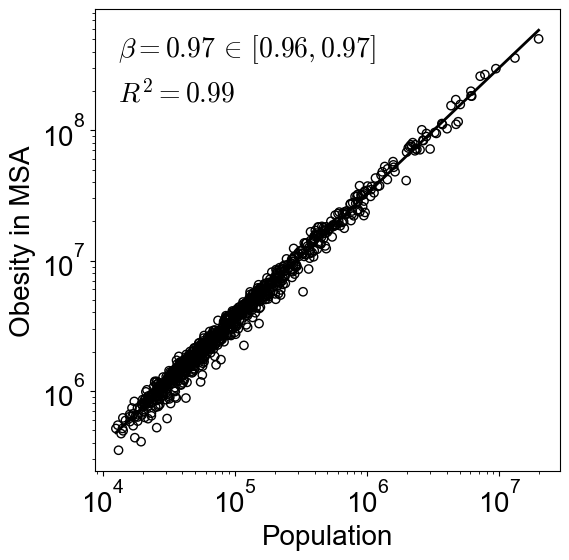

In [159]:
fit,SAMIs,beta,R2 = scaling_iloc(obesity_data_clean["TotalPopulation"],obesity_data_clean["Obs_count"],"Obesity in MSA")

912
Var =  0.01
intercept =  -3.31
c =  0.0


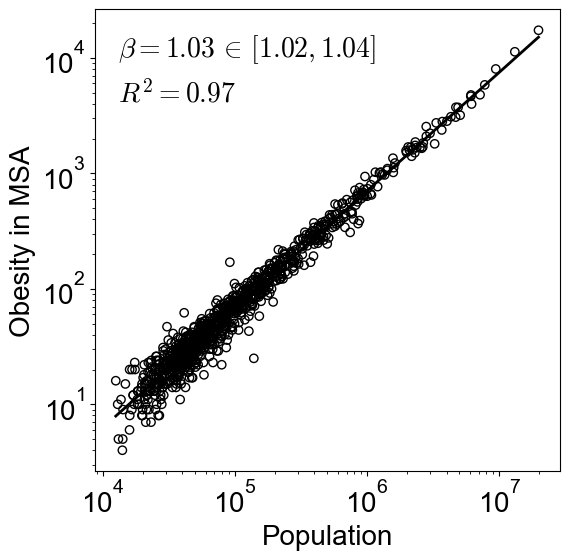

In [196]:
fit,SAMIs_ffr,beta,R2 = scaling_iloc(obesity_data_clean["TotalPopulation"],obesity_data_clean["FFR16"],"Obesity in MSA")

In [197]:
obesity_data_clean["SAMI_OBESITY"] = SAMIs
obesity_data_clean["SAMI_FFR"] = SAMIs_ffr
obesity_data_clean.merge(zip_msa,on="cbsa10")[["State","cbsa10","SAMI_OBESITY","SAMI_FFR","Percentage"]].sort_values(["Percentage"])

,State,cbsa10,SAMI_OBESITY,SAMI_FFR,Percentage
714,CA,C4150,-0.026566,-0.052007,5.3
303,CA,C2342,0.023790,-0.047098,5.3
685,CA,C4014,0.072653,-0.049662,5.3
702,CA,C4090,-0.025089,-0.011231,5.3
615,CA,C3710,-0.056930,0.030274,5.3
...,...,...,...,...,...
514,MS,C3282,0.078672,0.001493,14.4
158,MS,C1726,0.102471,0.037108,14.4
507,MS,C3262,0.065471,0.066714,14.4
338,MS,C2490,0.125758,-0.085553,14.4


SignificanceResult(statistic=0.7897582070276683, pvalue=1.1299985866186464e-10)

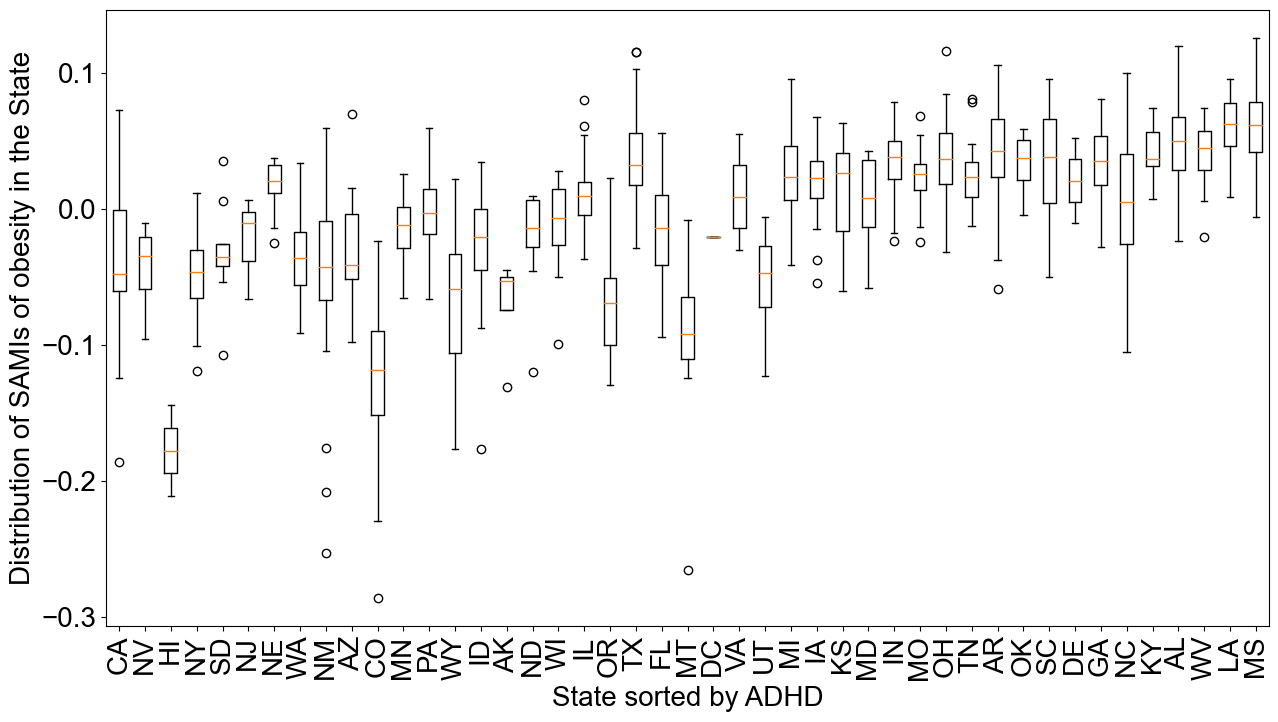

In [199]:
obesity_adhd = obesity_data_clean.merge(zip_msa,on="cbsa10")[["State","cbsa10","SAMI_OBESITY","Percentage"]].sort_values(["Percentage"])
sami_ob_adhd = [list(obesity_adhd.loc[(obesity_adhd["State"]==s),"SAMI_OBESITY"]) for s in obesity_adhd["State"].unique()]
sami_mean = [np.mean(obesity_adhd.loc[(obesity_adhd["State"]==s),"SAMI_OBESITY"]) for s in obesity_adhd["State"].unique()]
sami_percentage = [np.mean(obesity_adhd.loc[(obesity_adhd["State"]==s),"Percentage"]) for s in obesity_adhd["State"].unique()]
plt.figure(figsize=(15,8))
plt.boxplot(sami_ob_adhd)
plt.xticks(range(1,46),obesity_adhd["State"].unique(),rotation=90)
plt.xlabel("State sorted by ADHD")
plt.ylabel("Distribution of SAMIs of obesity in the State")
from scipy.stats import pearsonr, spearmanr
spearmanr(sami_mean,sami_percentage)

SignificanceResult(statistic=0.2505767089309184, pvalue=0.09686949554222896)

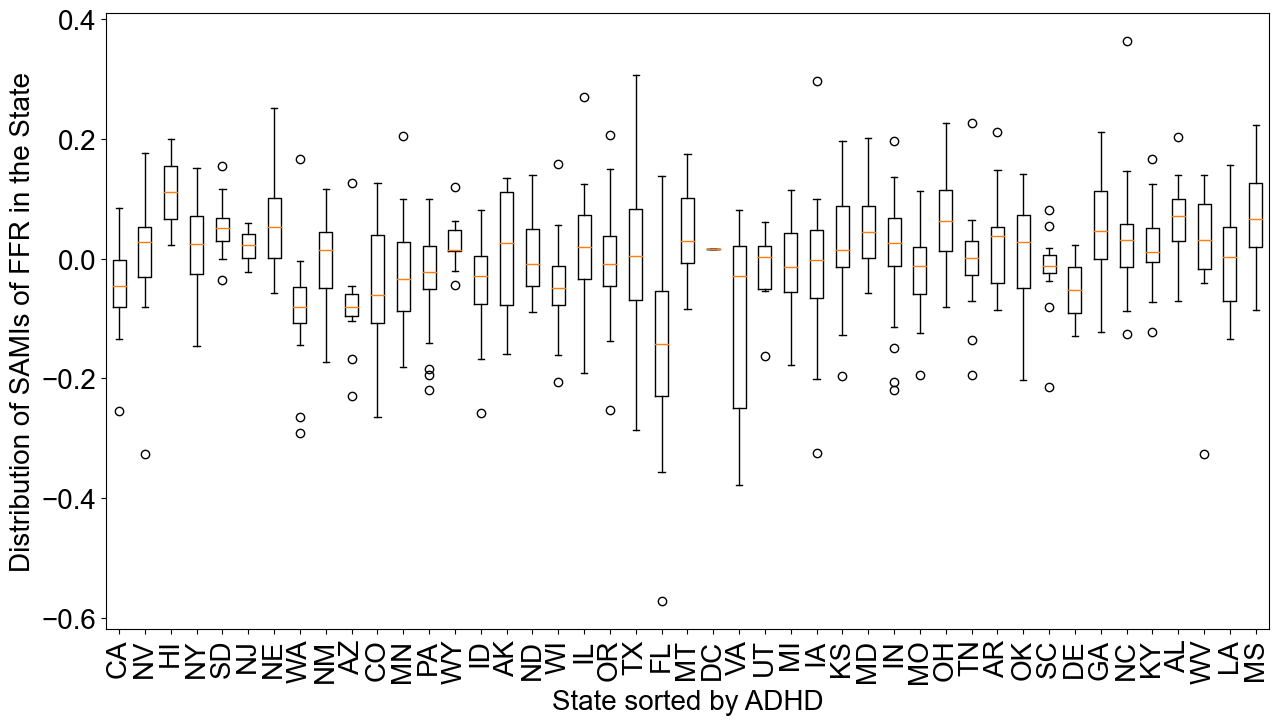

In [200]:
obesity_adhd = obesity_data_clean.merge(zip_msa,on="cbsa10")[["State","cbsa10","SAMI_FFR","Percentage"]].sort_values(["Percentage"])
sami_ob_adhd = [list(obesity_adhd.loc[(obesity_adhd["State"]==s),"SAMI_FFR"]) for s in obesity_adhd["State"].unique()]
sami_mean = [np.mean(obesity_adhd.loc[(obesity_adhd["State"]==s),"SAMI_FFR"]) for s in obesity_adhd["State"].unique()]
sami_percentage = [np.mean(obesity_adhd.loc[(obesity_adhd["State"]==s),"Percentage"]) for s in obesity_adhd["State"].unique()]
plt.figure(figsize=(15,8))
plt.boxplot(sami_ob_adhd)
plt.xticks(range(1,46),obesity_adhd["State"].unique(),rotation=90)
plt.xlabel("State sorted by ADHD")
plt.ylabel("Distribution of SAMIs of FFR in the State")
from scipy.stats import pearsonr, spearmanr
spearmanr(sami_mean,sami_percentage)

In [ ]:
obesity_data_1 = obesity_data_clean.merge(zip_msa,on="cbsa10")
obesity_data_1 = obesity_data_1[obesity_data_1["Range2"]==1]
obesity_data_2 = obesity_data_clean.merge(zip_msa,on="cbsa10")
obesity_data_2 = obesity_data_2[obesity_data_2["Range2"]==2]
obesity_data_3 = obesity_data_clean.merge(zip_msa,on="cbsa10")
obesity_data_3 = obesity_data_3[obesity_data_3["Range2"]==3]
# obesity_data_4 = obesity_data_clean.merge(zip_msa,on="cbsa10")
# obesity_data_4 = obesity_data_4[obesity_data_4["Range"]=="12 - < 15"]
# obesity_data_4

95
Var =  0.0
intercept =  1.7
c =  49.68


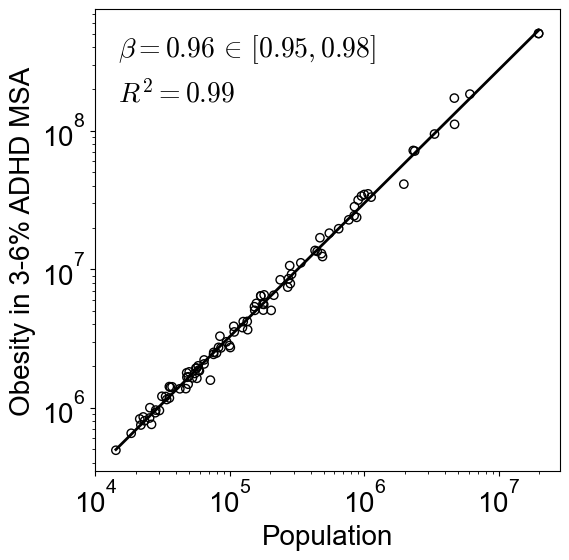

607
Var =  0.0
intercept =  1.69
c =  49.37


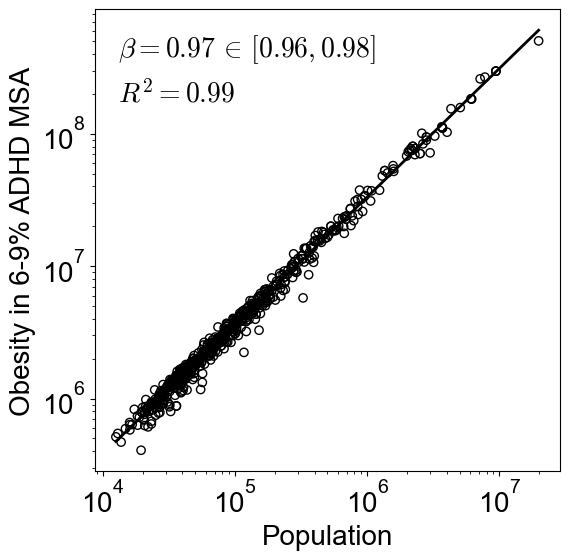

190
Var =  0.0
intercept =  1.79
c =  62.05


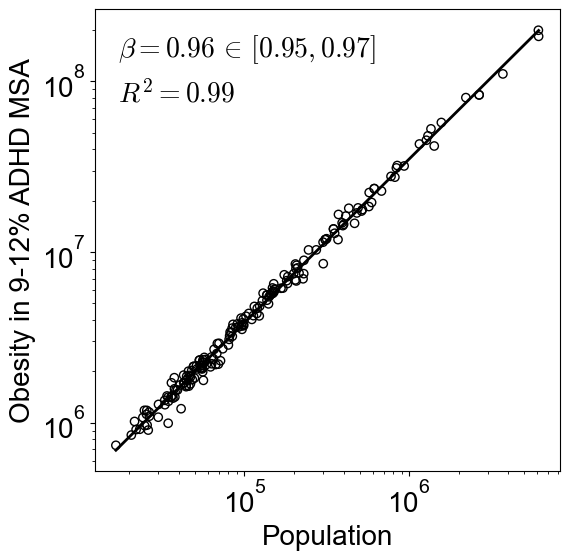

In [ ]:
fit,SAMIs,beta,R2 = scaling_iloc(obesity_data_1["TotalPopulation"],obesity_data_1["Obs_count"],"Obesity in 3-6% ADHD MSA")
fit,SAMIs,beta,R2 = scaling_iloc(obesity_data_2["TotalPopulation"],obesity_data_2["Obs_count"],"Obesity in 6-9% ADHD MSA")
fit,SAMIs,beta,R2 = scaling_iloc(obesity_data_3["TotalPopulation"],obesity_data_3["Obs_count"],"Obesity in 9-12% ADHD MSA")
# fit,SAMIs,beta,R2 = scaling_iloc(obesity_data_4["TotalPopulation"],obesity_data_4["Obs_count"],"Obesity in 12-15% ADHD MSA")

intercept =  1.67
c =  46.76
intercept =  1.74
c =  55.25


Text(0.5, 0, 'Population')

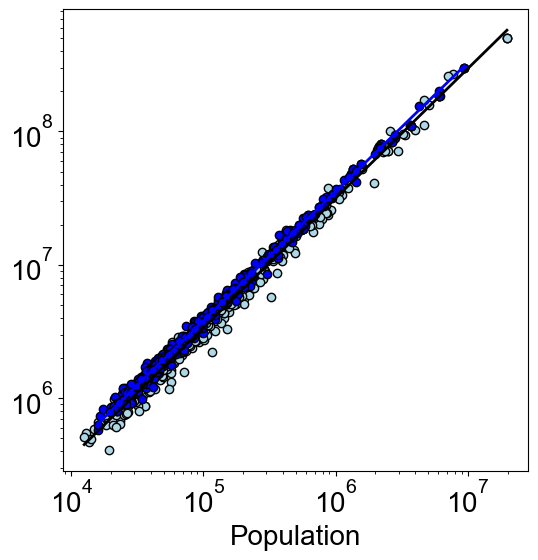

In [ ]:
x0 = obesity_data_low["TotalPopulation"]
y0 = obesity_data_low["Obs_count"]
x = np.log10(x0)
Y = np.log10(y0)
X = sm.add_constant(x)
model = sm.OLS(Y,X)
fit = model.fit(cov_type='HC1')


intercept, slope = fit.params
print("intercept = ", np.round(intercept,2))
print("c = ", np.round(10**intercept,2))

x_0 =  np.sort(x0)[0]
y_0 = 10**(slope*np.log10(x_0)+intercept)

x_f = np.sort(x0)[-1]
y_f = 10**(slope*np.log10(x_f)+intercept)
y_null = 10**(np.log10(x_f)+intercept)

betta = round(slope,2)
R2 = str(round(fit.rsquared,2))
beta_lowerbound, beta_upper = fit.conf_int().iloc[1]
beta_lowerbound = np.round(beta_lowerbound,2)
beta_upper = np.round(beta_upper,2)


plt.rcParams.update({
'font.size' : 20,
"lines.linewidth": 2,
"font.family":"arial",
#"font.serif": ["Computer Modern Roman"],
"mathtext.fontset": "cm",
"mathtext.default": "rm",
"mathtext.rm"  : "arial",
    })

fig,(ax)  = plt.subplots(1, 1, sharey='row',figsize=(6, 6))
ax.scatter(x0, y0, facecolors='lightblue', edgecolors='k')
ax.plot([x_0,x_f],[y_0,y_f], lw = 2, color = 'k')

# ax.text(0.05,0.95,r'$\beta = {}$'.format("{:.2f}".format(betta))+r'$ \, \in \,[{}$'.format(beta_lowerbound) + r'$,{}]$'.format(beta_upper),
#         ha='left', va='top',transform=ax.transAxes)
# ax.text(0.05,0.85,r'$\mathit{R}^2 = $' +r'${}$'.format(R2), ha='left', va='top',transform=ax.transAxes)

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Population")
# ax.set_ylabel(name)

x0 = obesity_data_high["TotalPopulation"]
y0 = obesity_data_high["Obs_count"]
x = np.log10(x0)
Y = np.log10(y0)
X = sm.add_constant(x)
model = sm.OLS(Y,X)
fit = model.fit(cov_type='HC1')


intercept, slope = fit.params
print("intercept = ", np.round(intercept,2))
print("c = ", np.round(10**intercept,2))

x_0 =  np.sort(x0)[0]
y_0 = 10**(slope*np.log10(x_0)+intercept)

x_f = np.sort(x0)[-1]
y_f = 10**(slope*np.log10(x_f)+intercept)
y_null = 10**(np.log10(x_f)+intercept)

betta = round(slope,2)
R2 = str(round(fit.rsquared,2))
beta_lowerbound, beta_upper = fit.conf_int().iloc[1]
beta_lowerbound = np.round(beta_lowerbound,2)
beta_upper = np.round(beta_upper,2)


plt.rcParams.update({
'font.size' : 20,
"lines.linewidth": 2,
"font.family":"arial",
#"font.serif": ["Computer Modern Roman"],
"mathtext.fontset": "cm",
"mathtext.default": "rm",
"mathtext.rm"  : "arial",
    })

# fig,(ax)  = plt.subplots(1, 1, sharey='row',figsize=(6, 6))
ax.scatter(x0, y0, facecolors='blue', edgecolors='k')
ax.plot([x_0,x_f],[y_0,y_f], lw = 2, color = 'b')

# ax.text(0.05,0.95,r'$\beta = {}$'.format("{:.2f}".format(betta))+r'$ \, \in \,[{}$'.format(beta_lowerbound) + r'$,{}]$'.format(beta_upper),
#         ha='left', va='top',transform=ax.transAxes)
# ax.text(0.05,0.85,r'$\mathit{R}^2 = $' +r'${}$'.format(R2), ha='left', va='top',transform=ax.transAxes)

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Population")

### FFR


95
Var =  0.01
intercept =  -3.3
c =  0.0


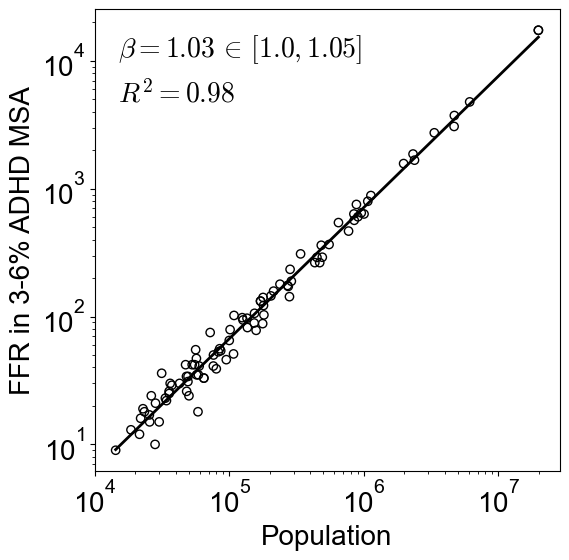

607
Var =  0.01
intercept =  -3.32
c =  0.0


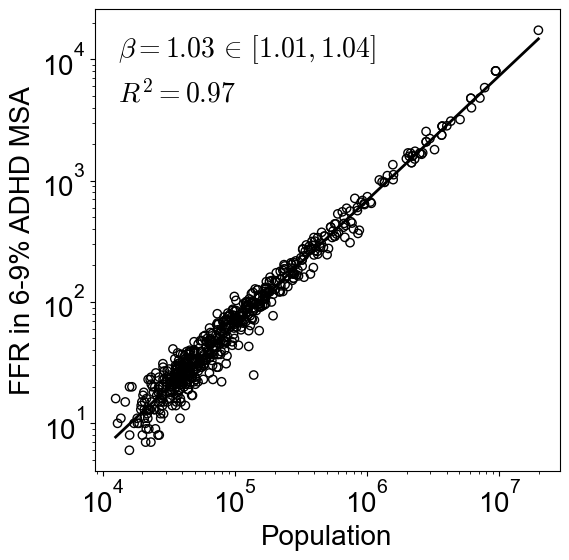

190
Var =  0.01
intercept =  -3.28
c =  0.0


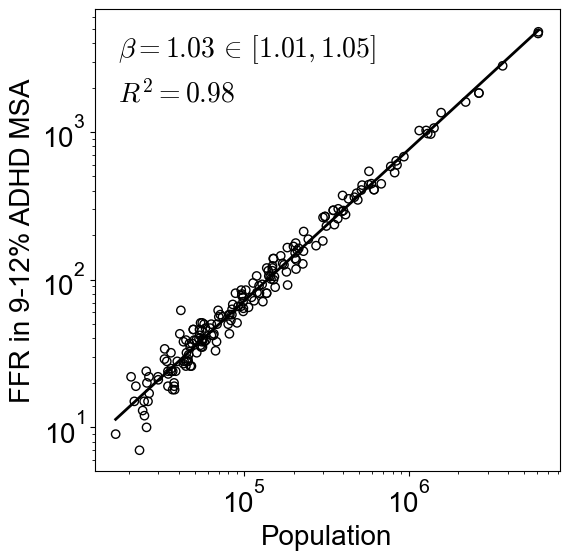

In [ ]:
fit,SAMIs,beta,R2 = scaling_iloc(obesity_data_1["TotalPopulation"],obesity_data_1["FFR16"],"FFR in 3-6% ADHD MSA")
fit,SAMIs,beta,R2 = scaling_iloc(obesity_data_2["TotalPopulation"],obesity_data_2["FFR16"],"FFR in 6-9% ADHD MSA")
fit,SAMIs,beta,R2 = scaling_iloc(obesity_data_3["TotalPopulation"],obesity_data_3["FFR16"],"FFR in 9-12% ADHD MSA")
# fit,SAMIs,beta,R2 = scaling_iloc(obesity_data_4["TotalPopulation"],obesity_data_4["FFR16"],"FFR in 12-15% ADHD MSA")

### PHYSCIAL INACTIVITY

1000
Var =  0.01
intercept =  -0.79
c =  0.16


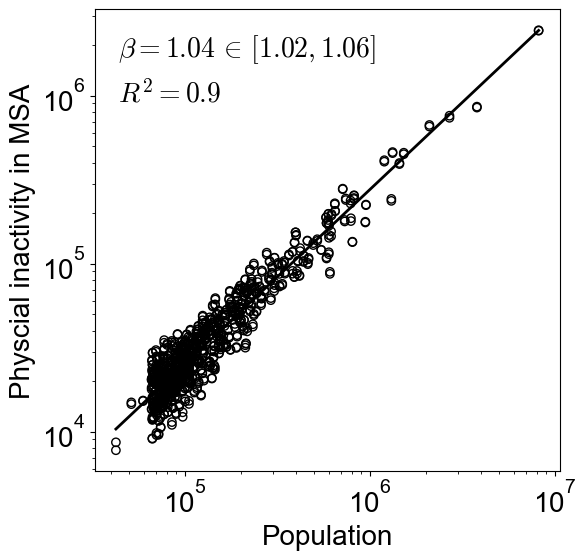

In [ ]:
physcial_inact = pd.read_csv("/Users/tg2426/Documents/Python/Scaling/Data/500_Cities__No_leisure-time_physical_activity_among_adults_aged___18_years.csv")
physcial_inact = physcial_inact[physcial_inact["GeographicLevel"]=="City"]
physcial_inact["EstimatedData"] = physcial_inact["Data_Value"]*physcial_inact["PopulationCount"]*.01
fit,SAMIs,beta,R2 = scaling_iloc(physcial_inact["PopulationCount"],physcial_inact["EstimatedData"],"Physcial inactivity in MSA")

In [ ]:
physcial_inact_low = physcial_inact.merge(zip_msa,left_on="StateAbbr",right_on="State")
physcial_inact_low = physcial_inact_low[physcial_inact_low["Percentage"]<=adhd_state["Percentage"].mean()]

physcial_inact_high = physcial_inact.merge(zip_msa,left_on="StateAbbr",right_on="State")
physcial_inact_high = physcial_inact_high[physcial_inact_high["Percentage"]>adhd_state["Percentage"].mean()]

20876
Var =  0.01
intercept =  -0.86
c =  0.14


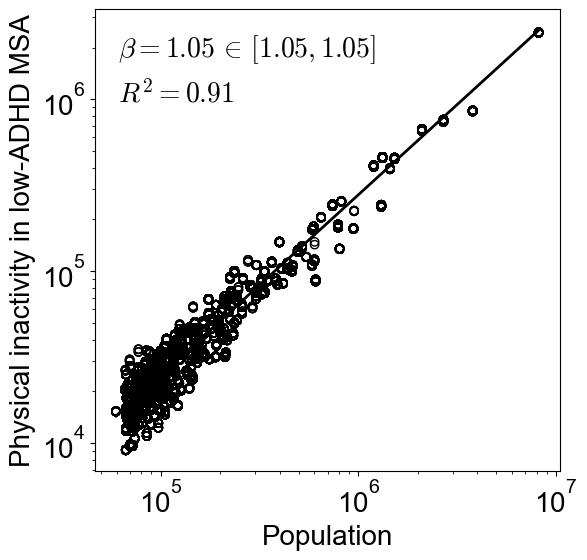

6960
Var =  0.01
intercept =  -0.77
c =  0.17


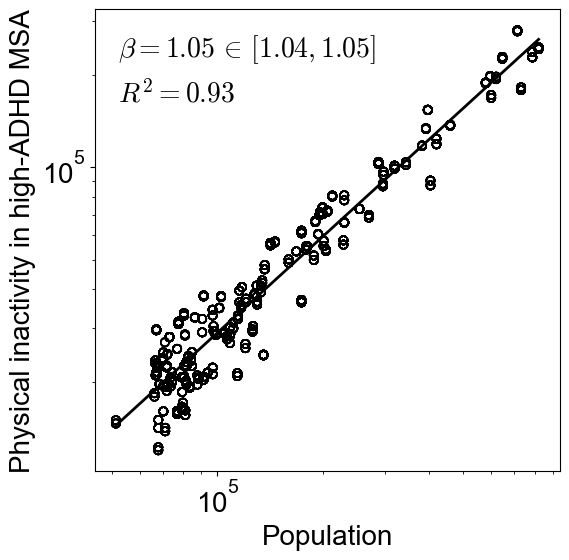

In [ ]:
fit,SAMIs,beta,R2 = scaling_iloc(physcial_inact_low["PopulationCount"],physcial_inact_low["EstimatedData"],"Physical inactivity in low-ADHD MSA")
fit,SAMIs,beta,R2 = scaling_iloc(physcial_inact_high["PopulationCount"],physcial_inact_high["EstimatedData"],"Physical inactivity in high-ADHD MSA")
